# Basics of Dynamodb 

- Store DynamoDB table data
- A table can have multiple partitions
- Number of table partitions depend on its size and provisioned capacity
- Managed internally by DynamoDB
- 1 partition = 10 GB of data
- 1 partition = 1000 WCUs or 3000 RCUs 

# DynamoDB Indexes

- Mandatory primary key - either simple or composite
- simple primary key => only partition or hash key
- Composite primary key => partition key + sort or range key
- partition or hash key decides the target partition

# Secondary Indexes

- local sencondary index : 5 max, 
- global secondary index : 5 max, asynchronously updated

# Interacting with DynamoDB

- Console
- AWS CLI
- AWS SDK

# Working with Dynamodb using AWS Console

# Item level operations with AWS Console

# Item level operations with AWS

- Read

# Write operations

- AWS.DynamoDB
- AWS.DynamoDB.DocumentClient

# Conditional Writes

- Are idempotent
- Returns conditionalCheckFailedException if condition fails
- Consumed Capacity not returned
- WCUs are consumed

# Atomic Counter

- Increment / decrement atomically
- UpdateItem API
- Not Idempotent
- All requests are applied in order
- Not suitable for applications demanding high degree of accuracy

# DynamoDB Architecture

- Consistent Hashing

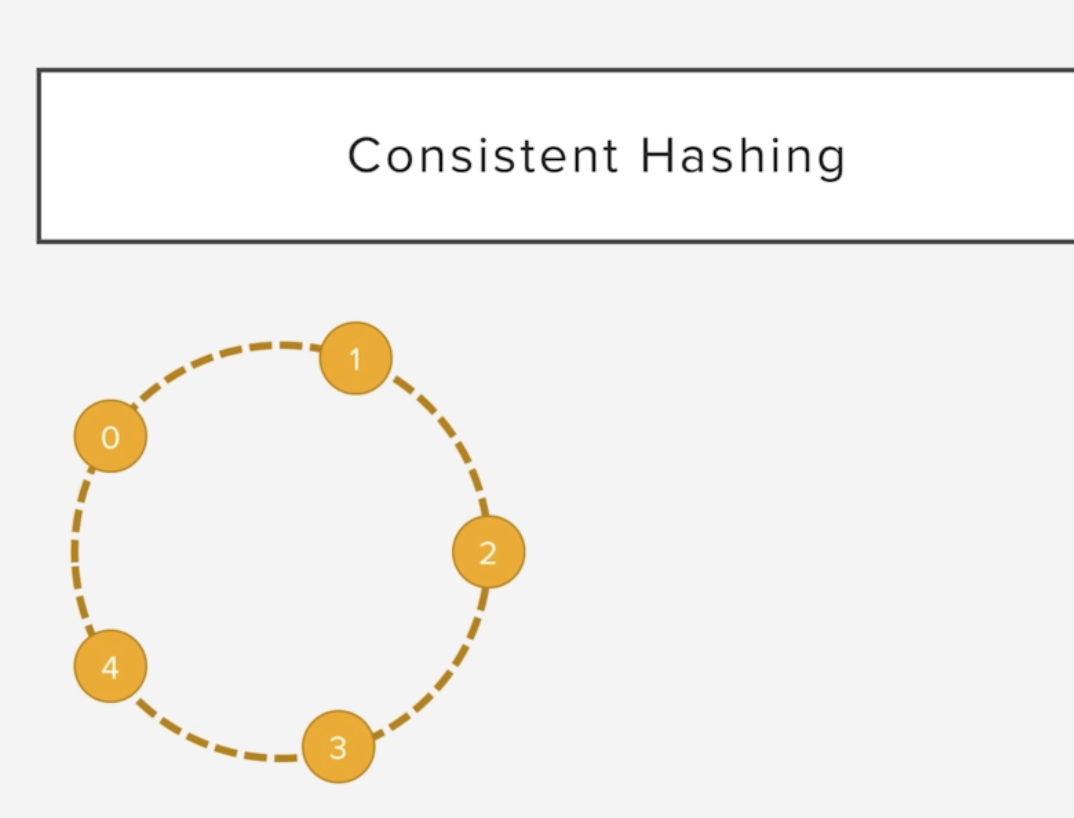

# DynamoDB Partition

- 1 partition 
    - 3000 RCUs
    - 1000 WCUs
    - 10GB SSD

Pt = Round up ( (1000 / 3000) + (500 / 1000) )
0.67

Pt = 1

Ps = Round up ( 5 GB / 10 GB )
0.5

Ps = 1

P = max(1, 1)

P = 1

- DynamoDB do not de-allocate the partitions

# DynamoDB Efficient Key Design

- Simple Keys : partition key
- Composite Keys : partition key + sort key

- Data Distribution
    - Ensure uniform distribution of data across partitions
    - Use as many unique values for partition key as possible
    
- Read/write patterns
    - PCUs and WCUs get equally distributed between the partitions
    - Prevent hot partitions
    - Ensure uniform utilization of RCUs and WCUs

# Efficient Key Design

- Time Series Data
    - Segregate hot and cold data in to seprate tables
- Scan Operations and Filters
    - Always prefer query operations
    - Choose keys and indexes so as to avoid scan operations and filters

 - local secondary indexes
     - When application needs same partition key as the table
     - When you need to avoid additional costs
     - When application needs strongly consistent index reads
 
- Global Secondary indexes
    - when application needs different or same partition key as the table
    - When application needs finer throughput control
    - When application only needs eventually consistent index reads

- partition key should have many unique values
- uniform distribution of read/write operations across partitions
- store hot and cold data in seprate tables
- consider all possible query patterns to eliminate use of scan operations and filter
- choose sort key depending on your applcation's needs
- use indexes based on when your application's query pattehrn
- use primary key or local secondary indexes when strong consistency is desired
- use global secondary index for finer control over throughput or when your application needs to uqery using partition key

# Hot Keys or Hot Partitions

- time series data
    - old data infrequently 
    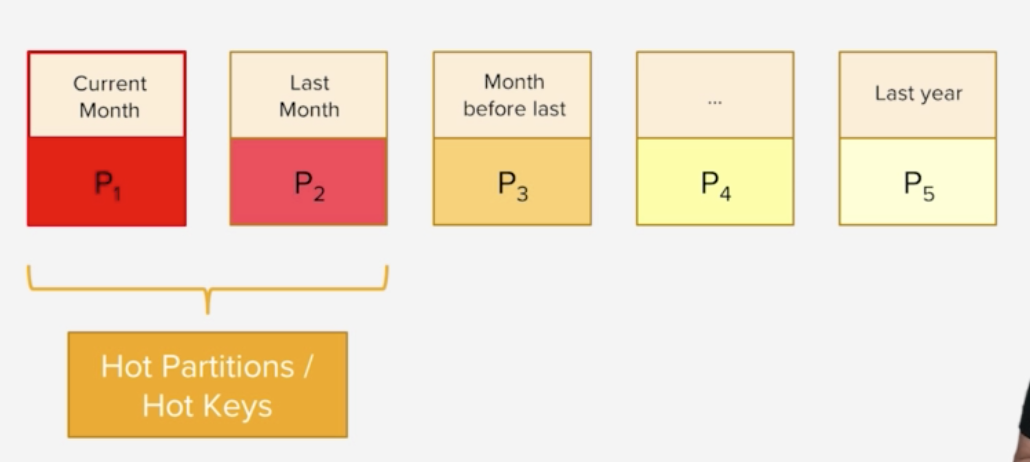
- popular datasets

- How?
    - Using Cache like DAX 
    - partition the partition key again ('to spread')
    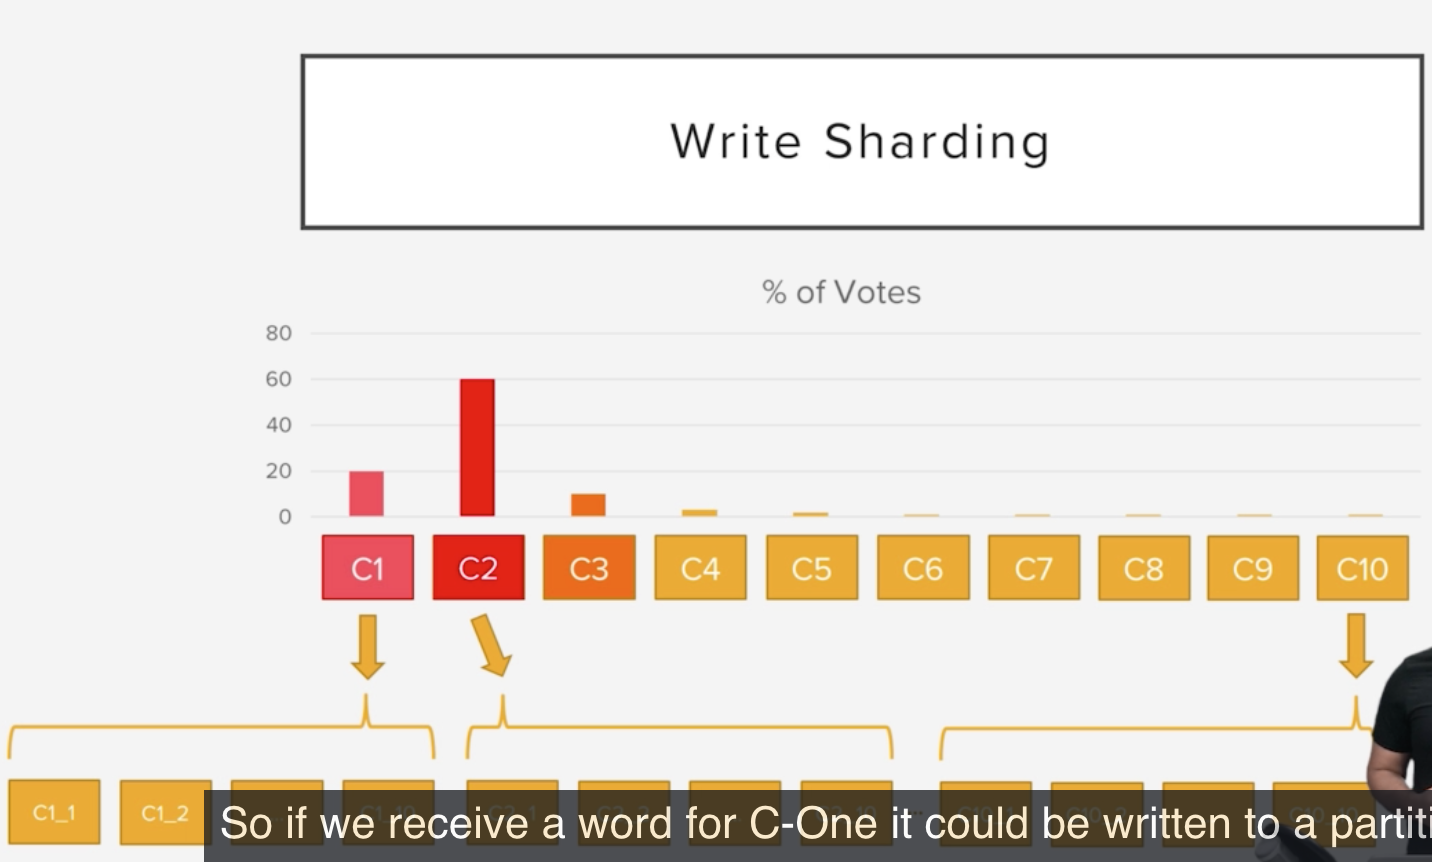

# DynamoDB Design Patterns

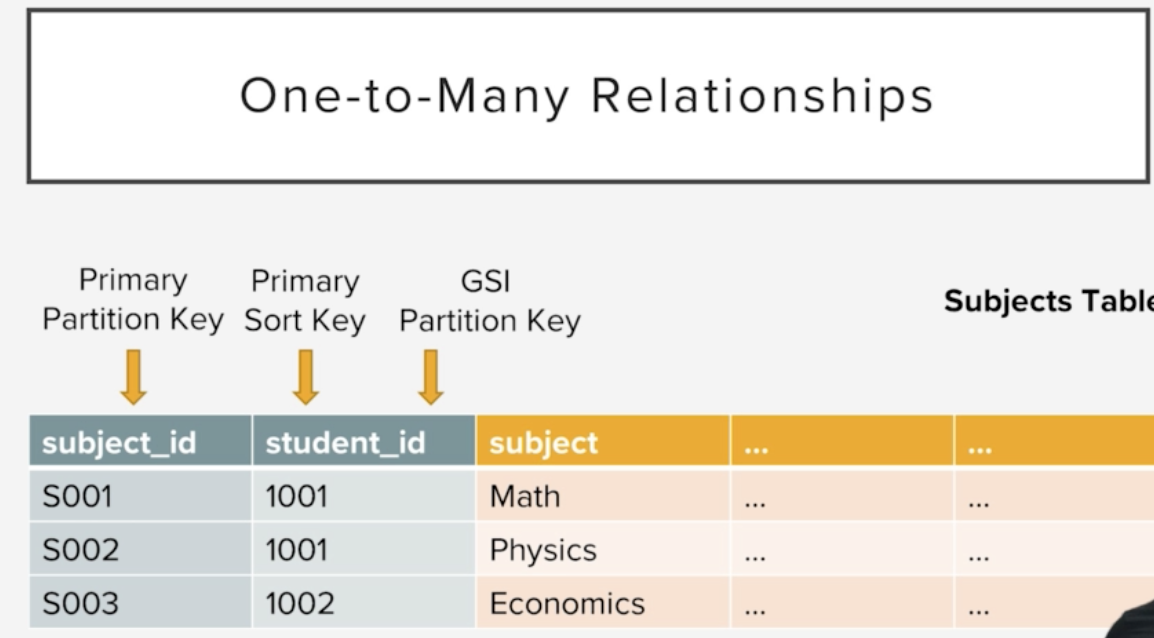

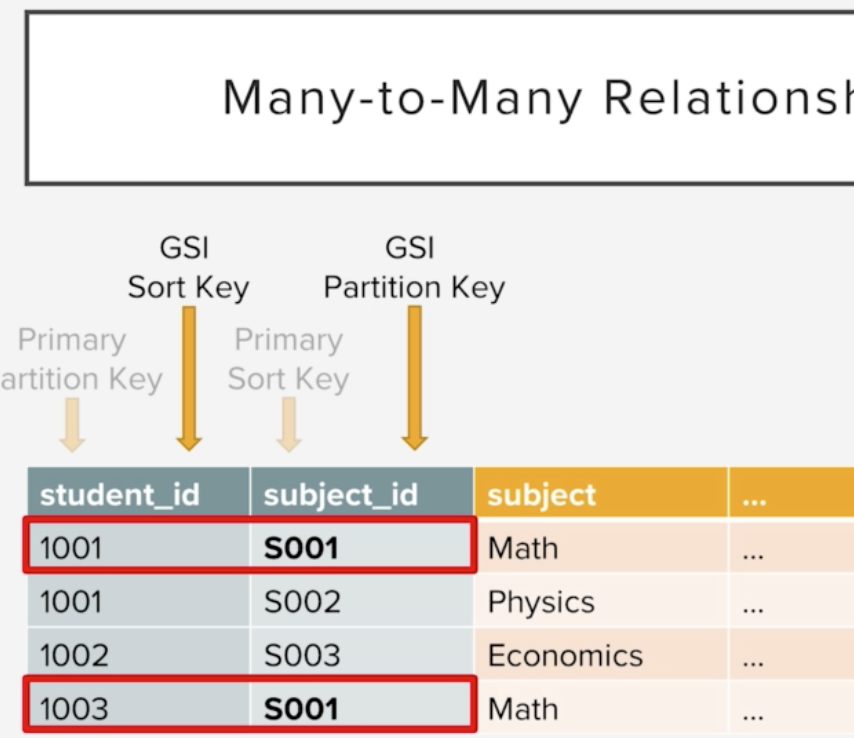

# Multi-value Sorts and Filters

# Dynamo DB Limits

# Error Handling in DynamoDB

- AccessDeniedException
- ConditionalCheckFailedException
- ItemCollectionSizeLimitExceededException
- LimitExceededException
- ResourceInUseException
- ValidationException
- ProvisionedThroughputExceededException

- Error Retries
- ExponentialBackoff

# Best Practices

- Uniform Data Access
    - To achieve maximum utilization of the resources
    - avoid hot partition
    
- Temporary Substantial Capacity Scaling

- Read operations
    - Avoid scans
    - Avoid filters
    - Use eventual consistency

- LSI
    - Use LSIs sparingly
    - project fewer attributes
    - use sparse indexes
    - watch for exapnding item collections

# Ways to lower DynamoDB costs

- Provisioned Throughput
    - use sparse indexes
    - proejt fewer attributes
    - design for uniform workloads
    - use compression
    - avoid scans and filters
    - archive old data
    - use eventual consistency
    - choose low-cost region
    - use auto-scaling
    - leverage reserved capacity
- Data Storage
- Data Transfer
- Global Tables
- Backups
- DAX
- Streams

# Auto Scaling

# DynamoDB Streams

# TTL

- Defines expiry timestamp of the table item
- items marked for deletion on expiry
- expired items are removed from the table and indexes within about 48 hrs
- Applicaiton should use filter operations to exclude items marked for deletion

# Global tables

# Implementing CRR with Dynamo